## Learning objectives

By the end of this lesson, you will be able to:

* Apply transformations to make target variable more normally distributed for Regression
* Apply inverse transformations to be able to use these in a Regression context


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
%matplotlib inline

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In the following cells we will load the data and define some useful plotting functions.


In [2]:
np.random.seed(72018)


def to_2d(array):
    return array.reshape(array.shape[0], -1)
    
def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data)
    plt.show()
    return data
    
def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle"
response = requests.get(url)

### Loading the Boston Housing Data


In [4]:
with open('boston_housing_clean.pickle', 'wb') as file:
    file.write(response.content)
    
with open('boston_housing_clean.pickle', 'rb') as to_read:
    boston = pd.read_pickle(to_read)
boston_data = boston['dataframe']
boston_description = boston['description']


In [5]:
boston_data.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


### Determining Normality


Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

How can we tell if our target is normally distributed? There are two ways:

* Using a Visual approach
* Using a Statistical Test


#### Using a Visual approach


#### Plotting a histogram:


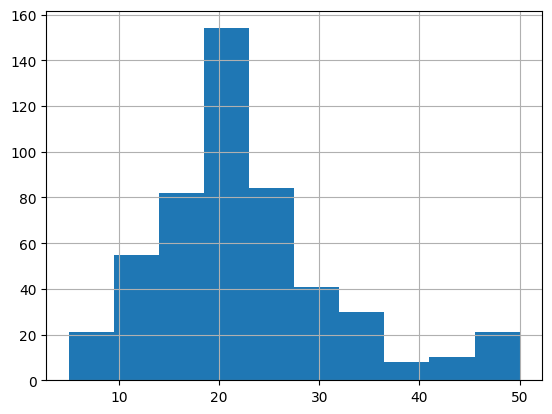

In [6]:
boston_data.MEDV.hist();

The histogram does not look normal due to its right tail.


#### Using a Statistical Test


Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a **p-value**. The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.


In [7]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

In [8]:
normaltest(boston_data.MEDV.values)

NormaltestResult(statistic=np.float64(90.9746873700967), pvalue=np.float64(1.7583188871696098e-20))

The p-value which is 1.7583188871696098e-20 in reality means that we have 20 zeros before the 1:

$p-value = 0.000000000000000000017583188871696098$

p-value is _extremely_ low. Our **y** variable which we have been dealing with this whole time was not normally distributed!


### Apply transformations to make target variable more normally distributed for Regression


Linear Regression assumes a normally distributed residuals which can be aided by transforming **y** variable which is the target variable. Let's try some common transformations to try and get **y** to be normally distributed: 

* Log Transformation
* Square root Transformation
* Box cox Transformation


### Log Transformation


The log transformation can transform data that is significantly skewed right to be more normally distributed:


**Apply transformation to Boston Housing data:**


In [9]:
log_medv = np.log(boston_data.MEDV)

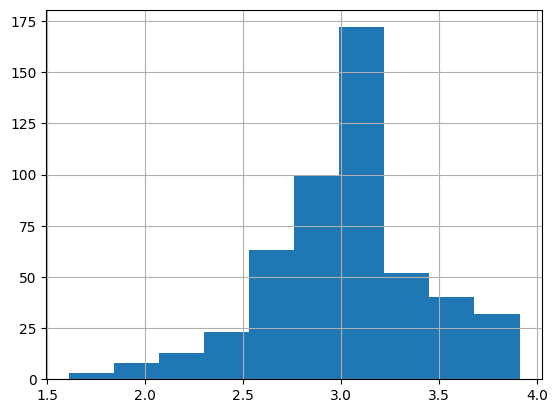

In [10]:
log_medv.hist();

In [11]:
normaltest(log_medv)

NormaltestResult(statistic=np.float64(17.21801696640697), pvalue=np.float64(0.00018245472768345307))

Conclusion: The output is closer to normal distribution, but still not completely normal.


### Square root Transformation

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:


#### Exercise


Apply the square root transformation to the Boston Housing data target and test whether the result is normally distributed.


(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <BarContainer object of 10 artists>)

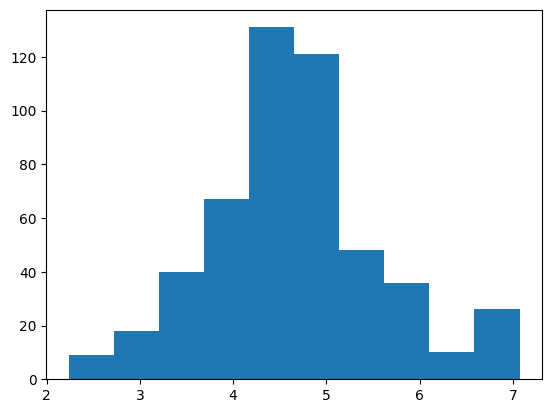

In [12]:
sqrt_medv = np.sqrt(boston_data['MEDV'])
plt.hist(sqrt_medv)

In [13]:
normaltest(sqrt_medv)

NormaltestResult(statistic=np.float64(20.487090826863067), pvalue=np.float64(3.558645701429252e-05))

In [14]:
sqrt_medv.skew()

np.float64(0.43893531933950786)

### Box cox Transformation


The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.


In [15]:
from scipy.stats import boxcox

In [16]:
bc_result = boxcox(boston_data['MEDV'])

boxcox_medv = bc_result[0]
lam = bc_result[1]

In [17]:
lam

np.float64(0.21662091178859486)

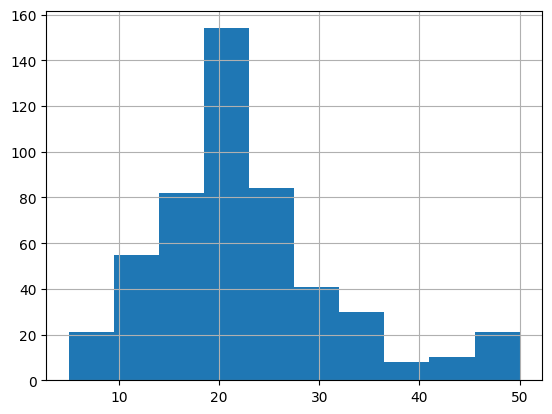

In [18]:
boston_data['MEDV'].hist();

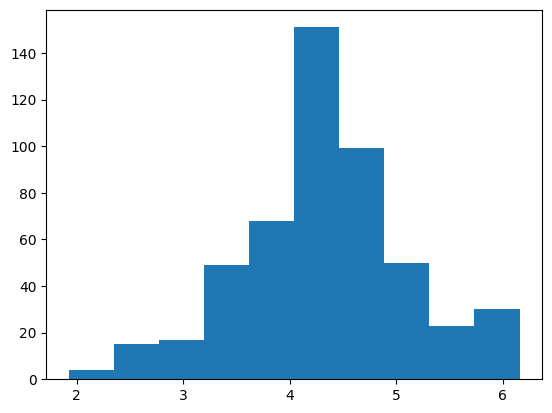

In [19]:
plt.hist(boxcox_medv);

In [20]:
normaltest(boxcox_medv)

NormaltestResult(statistic=np.float64(4.513528743199032), pvalue=np.float64(0.10468867097426256))

We find that the box cox results in a graph which is significantly more normally distributed (according to p value) than the other two distributions.This can be even above 0.05.

Now that we have a normally distributed y-variable, let's test Regression using this transformed target variables.


### Testing regression:


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

In [22]:
lr = LinearRegression()

**Define and load the predictor (X) and Target(y) variables**


In [23]:
y_col = 'MEDV'

X = boston_data.drop(y_col, axis = 1)
y = boston_data[y_col]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


**Create Polynomial Features**


In [24]:
pf = PolynomialFeatures(degree = 2, include_bias = False)
X_pf = pf.fit_transform(X)
X_pf

array([[6.32000000e-03, 1.80000000e+01, 2.31000000e+00, ...,
        1.57529610e+05, 1.97656200e+03, 2.48004000e+01],
       [2.73100000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        1.57529610e+05, 3.62766600e+03, 8.35396000e+01],
       [2.72900000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        1.54315409e+05, 1.58310490e+03, 1.62409000e+01],
       ...,
       [6.07600000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.57529610e+05, 2.23851600e+03, 3.18096000e+01],
       [1.09590000e-01, 0.00000000e+00, 1.19300000e+01, ...,
        1.54802902e+05, 2.54955600e+03, 4.19904000e+01],
       [4.74100000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.57529610e+05, 3.12757200e+03, 6.20944000e+01]])

In [25]:
X.shape

(506, 13)

In [26]:
X_pf.shape

(506, 104)

**Split the data into Training and Test Sets**   

The split ratio here is 0.7 and 0.3 which means we will assign **70%** data for training and **30%** data for testing


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size = 0.3, random_state=72018 )

In [28]:
X_train.shape

(354, 104)

**Normalize the training data using `StandardScaler` on `X_train`. Use fit_transform() function**


In [29]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_train_s.shape

(354, 104)

**Discuss: what transformation do we need to apply next?**

Apply the appropriate transformation.


In [30]:
bc_result2 = boxcox(y_train)

y_train_bc = bc_result2[0]
lam2 = bc_result2[1]
# It's the same that: y_train_bc, lam2 = bc_result2
y_train_bc

array([4.86256872, 6.06291788, 4.51310422, 4.81957911, 4.95725441,
       5.77277513, 5.41197103, 5.7564064 , 3.72665154, 4.94686905,
       5.7564064 , 4.80874124, 3.92225304, 4.58384079, 4.78695489,
       6.64804038, 3.7730073 , 2.91446766, 3.99405238, 5.37557172,
       2.91446766, 5.14858228, 3.3783037 , 5.61413707, 4.46503232,
       6.62861297, 3.53307618, 3.78829071, 4.66439022, 4.74293125,
       4.76501905, 4.58384079, 6.66093847, 4.90499291, 4.72068897,
       5.15835234, 3.30653008, 3.15681305, 4.60706701, 6.00211597,
       7.02952231, 4.68703021, 3.78829071, 5.05933498, 4.19940571,
       4.93645047, 6.30368162, 7.02952231, 5.65657873, 4.54867384,
       4.59547548, 4.60706701, 4.84114572, 5.37557172, 3.93675684,
       4.22573747, 4.60706701, 4.47712076, 4.54867384, 5.61413707,
       4.93645047, 2.39638824, 4.88385039, 3.67951377, 5.08935181,
       4.78695489, 6.22514014, 4.92599843, 6.02503493, 4.10535841,
       4.4284789 , 4.59547548, 5.51012874, 3.51631102, 5.05933

As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data


In [31]:
y_train_bc.shape

(354,)

In [32]:
lr.fit(X_train_s, y_train_bc) # we're stablishing our parameters, it will fit our LR to the X and y
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

In [33]:
y_test

502    20.6
127    16.2
390    15.1
303    33.1
277    33.1
       ... 
433    14.3
505    11.9
53     23.4
82     24.8
377    13.3
Name: MEDV, Length: 152, dtype: float64

In [34]:
y_pred_bc

array([4.4392342 , 4.16090928, 4.15308658, 5.72559281, 5.70300643,
       6.59889512, 4.18332001, 4.77591019, 4.68614576, 4.85728949,
       6.83944548, 3.76006133, 5.06792522, 4.366021  , 6.91067234,
       4.94872356, 4.64047978, 5.83610114, 5.25013614, 5.44752214,
       3.97745097, 4.88502896, 4.20357879, 3.61242521, 5.23497779,
       5.30389206, 5.86527586, 4.79984562, 4.79631521, 6.80365128,
       3.36716519, 4.39738313, 4.298454  , 6.96423331, 4.49871237,
       5.52039179, 4.8001967 , 5.61272414, 3.05186393, 5.34227359,
       3.34081629, 3.97104152, 5.13918248, 4.3799833 , 5.06134125,
       6.28670359, 4.90206081, 5.25595643, 5.69828211, 4.21011239,
       5.23206192, 5.48921777, 4.37075215, 3.94811697, 4.15121064,
       2.74849191, 4.06553469, 3.13202418, 4.55300092, 4.80245929,
       5.74892338, 3.2618593 , 3.53812201, 6.17778723, 4.23622528,
       5.82374079, 3.41359682, 3.83978181, 4.96307822, 5.74303973,
       5.20656217, 5.22395333, 5.25945062, 5.43876017, 3.83969

### Discussion

* Are we done?
* What did we predict?
* How would you interpret these predictions?


#### Apply inverse transformations to be able to use these in a Regression context


Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:


In [35]:
from scipy.special import inv_boxcox

In [36]:
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [37]:
boston_data['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

Exactly the same, as we would hope!


### Exercise:

1. Apply the appropriate inverse transformation to `y_pred_bc`.
2. Calculate the $R^2$ using the result of this inverse transformation and `y_test`.  

**Hint:** Use the **inv_boxcox()** function to get the transformed predicted values


In [42]:
#Enter your code here
y_pred_tran = inv_boxcox(y_pred_bc, lam2)
r2_score(y_test, y_pred_tran)


0.8884878248134334

## Practice Exercise: 

### Determine the R^2 of a LinearRegression without the box cox transformation.


In [43]:
# Enter your code here
lr = LinearRegression()
lr.fit(X_train_s, y_train)
lr_pred = lr.predict(X_test_s)

r2_score(y_test, lr_pred)

0.8689110469231008

<details><summary>Click here for a sample python solution</summary>

```python
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(y_test,lr_pred)

```
